In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

# Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/oasis/spam.csv',encoding='ISO-8859-1')

In [ ]:
data.keys()

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data.shape

(5572, 5)

In [ ]:
print(data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
print(data[10:21])
sliced_data=data[10:21]
print(sliced_data)

      v1                                                 v2 Unnamed: 2  \
10   ham  I'm gonna be home soon and i don't want to tal...        NaN   
11  spam  SIX chances to win CASH! From 100 to 20,000 po...        NaN   
12  spam  URGENT! You have won a 1 week FREE membership ...        NaN   
13   ham  I've been searching for the right words to tha...        NaN   
14   ham                I HAVE A DATE ON SUNDAY WITH WILL!!        NaN   
15  spam  XXXMobileMovieClub: To use your credit, click ...        NaN   
16   ham                         Oh k...i'm watching here:)        NaN   
17   ham  Eh u remember how 2 spell his name... Yes i di...        NaN   
18   ham  Fine if thatåÕs the way u feel. ThatåÕs the wa...        NaN   
19  spam  England v Macedonia - dont miss the goals/team...        NaN   
20   ham          Is that seriously how you spell his name?        NaN   

   Unnamed: 3 Unnamed: 4  
10        NaN        NaN  
11        NaN        NaN  
12        NaN        NaN  
13 

In [ ]:
z = data['v1']
y = data["v2"]
z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)

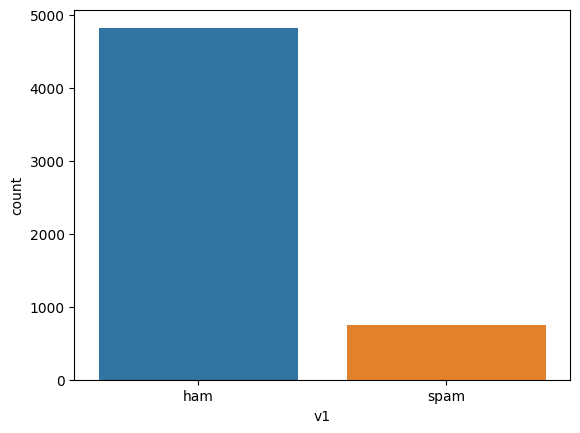

In [ ]:
sns.countplot(x='v1', data=data)
plt.show()

In [ ]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
data['v2'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
data['Spam']=data['v1'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


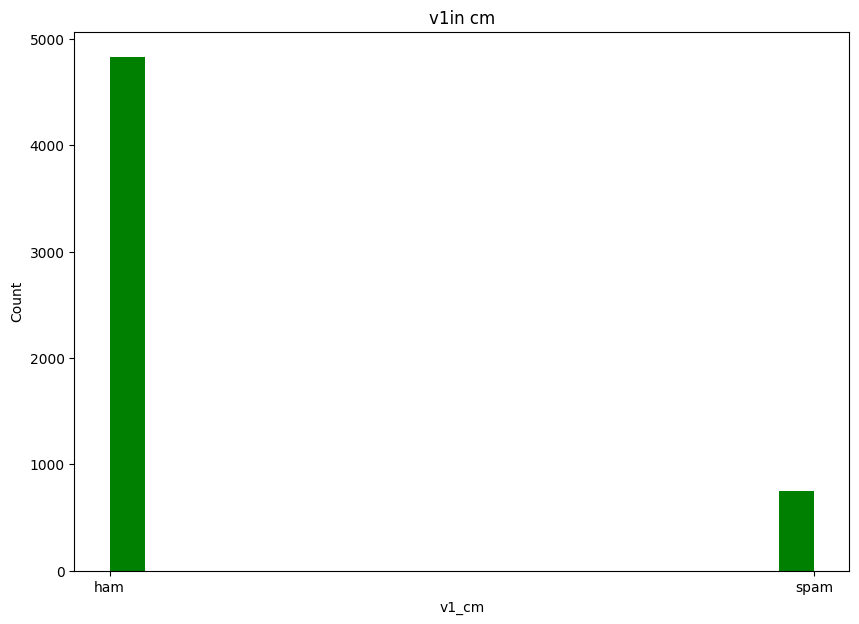

In [ ]:
plt.figure(figsize = (10, 7))
x = data["v1"]

plt.hist(x, bins = 20, color = "green")
plt.title("v1in cm")
plt.xlabel("v1_cm")
plt.ylabel("Count")

plt.show()

In [ ]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Spam
5269,spam,"If you don't, your prize will go to another cu...",NaN,NaN,NaN,1
2665,ham,R u meeting da ge at nite tmr?,NaN,NaN,NaN,0
4788,ham,We're on the opposite side from where we dropp...,NaN,NaN,NaN,0
3144,ham,I.ll get there tomorrow and send it to you,NaN,NaN,NaN,0
4272,ham,Kind of. Just missed train cos of asthma attac...,NaN,NaN,NaN,0


In [ ]:
data.describe(include = 'all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Spam
count,5572,5572,50,12,6,5572.000000
unique,2,5169,43,10,5,NaN
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)""",NaN
freq,4825,30,3,2,2,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.134063
std,NaN,NaN,NaN,NaN,NaN,0.340751
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,0.000000


In [ ]:
data.groupby('v1').describe()

Spam                                   
       count mean  std  min  25%  50%  75%  max
v1                                             
ham   4825.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam   747.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

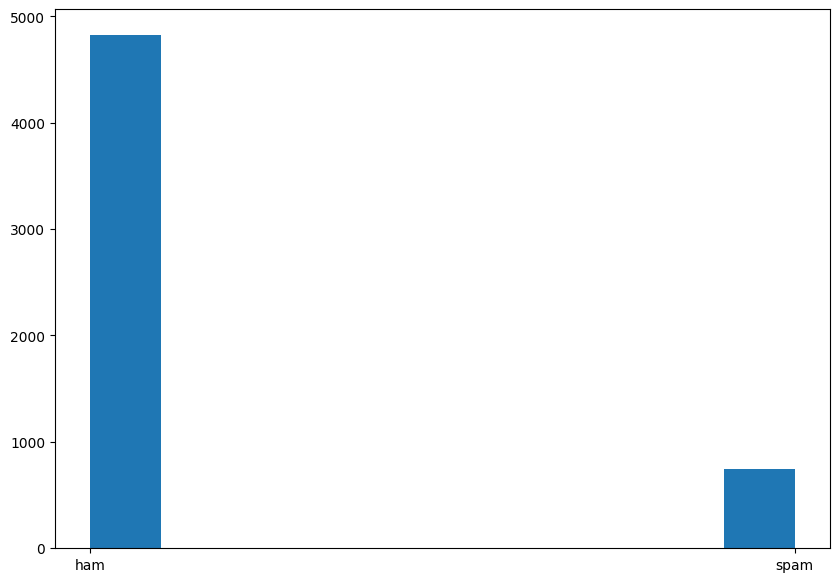

In [ ]:
plt.figure(figsize = (10, 7))
x = data["v1"]
plt.hist(x)
plt.show()
